# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
import scipy.stats as st
import time

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [69]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [75]:
# Set the API base URL
api_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = api_url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    # Get weather data
    weather_response = requests.get(city_url)
    weather_json = weather_response.json()
    time.sleep(2)
    
    try:
        # Parse the JSON and retrieve data
        city_weather = weather_json

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | zeya
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | provideniya
Processing Record 5 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | deputatskiy
Processing Record 9 of Set 1 | bilma
Processing Record 10 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 13 of Set 1 | sikeston
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | maryville
Processing Record 17 of Set 1 | neryungri
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | petapa
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | sa

Processing Record 33 of Set 4 | surt
Processing Record 34 of Set 4 | raga
Processing Record 35 of Set 4 | yei
Processing Record 36 of Set 4 | east london
Processing Record 37 of Set 4 | roebourne
Processing Record 38 of Set 4 | camocim
Processing Record 39 of Set 4 | polis
Processing Record 40 of Set 4 | veraval
Processing Record 41 of Set 4 | victor harbor
Processing Record 42 of Set 4 | esperance
Processing Record 43 of Set 4 | katsuura
Processing Record 44 of Set 4 | okitipupa
Processing Record 45 of Set 4 | torbay
Processing Record 46 of Set 4 | yuzhnyy
Processing Record 47 of Set 4 | cururupu
Processing Record 48 of Set 4 | oranjemund
Processing Record 49 of Set 4 | aksarka
Processing Record 0 of Set 5 | show low
Processing Record 1 of Set 5 | scarborough
Processing Record 2 of Set 5 | guerrero negro
Processing Record 3 of Set 5 | piacabucu
Processing Record 4 of Set 5 | conceicao do araguaia
Processing Record 5 of Set 5 | pisco
Processing Record 6 of Set 5 | tevaitoa
Processing R

Processing Record 25 of Set 8 | iguatu
Processing Record 26 of Set 8 | beringovskiy
Processing Record 27 of Set 8 | flinders
Processing Record 28 of Set 8 | beloha
Processing Record 29 of Set 8 | vila
Processing Record 30 of Set 8 | santa rosa
Processing Record 31 of Set 8 | matara
Processing Record 32 of Set 8 | coari
Processing Record 33 of Set 8 | khani
Processing Record 34 of Set 8 | mishan
Processing Record 35 of Set 8 | brasilia
Processing Record 36 of Set 8 | mnogovershinnyy
Processing Record 37 of Set 8 | bhim tal
Processing Record 38 of Set 8 | buala
Processing Record 39 of Set 8 | takoradi
Processing Record 40 of Set 8 | eureka
Processing Record 41 of Set 8 | khartoum
Processing Record 42 of Set 8 | moree
Processing Record 43 of Set 8 | korla
Processing Record 44 of Set 8 | dalnegorsk
Processing Record 45 of Set 8 | gambela
Processing Record 46 of Set 8 | cayenne
Processing Record 47 of Set 8 | kyren
Processing Record 48 of Set 8 | ahar
Processing Record 49 of Set 8 | olafsvi

Processing Record 13 of Set 12 | touros
Processing Record 14 of Set 12 | imbituba
Processing Record 15 of Set 12 | santiago de cao
Processing Record 16 of Set 12 | papetoai
Processing Record 17 of Set 12 | hobyo
Processing Record 18 of Set 12 | salinas
Processing Record 19 of Set 12 | ust-nera
Processing Record 20 of Set 12 | olovyannaya
Processing Record 21 of Set 12 | lorengau
Processing Record 22 of Set 12 | okakarara
Processing Record 23 of Set 12 | bodden town
Processing Record 24 of Set 12 | west wendover
Processing Record 25 of Set 12 | irati
Processing Record 26 of Set 12 | arlit
Processing Record 27 of Set 12 | muriwai beach
Processing Record 28 of Set 12 | nanortalik
Processing Record 29 of Set 12 | lata
Processing Record 30 of Set 12 | mormugao
Processing Record 31 of Set 12 | adiake
Processing Record 32 of Set 12 | cap estate
Processing Record 33 of Set 12 | xiaoweizhai
Processing Record 34 of Set 12 | tromso
Processing Record 35 of Set 12 | murree
Processing Record 36 of S

In [76]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [77]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,14.33,82,34,1.81,ZA,1680548277
1,zeya,53.7500,127.2667,-6.35,91,100,3.36,RU,1680548279
2,albany,42.6001,-73.9662,15.91,32,19,4.02,US,1680548008
3,provideniya,64.3833,-173.3000,-13.56,94,89,3.39,RU,1680548283
4,cape town,-33.9258,18.4232,17.84,84,0,2.57,ZA,1680548116


In [78]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [79]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
city_data_df["Date"] = city_data_df["Date"].astype({'Date': "datetime64[s]"})
date = city_data_df["Date"][0].strftime("%m/%d/%Y")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,14.33,82,34,1.81,ZA,2023-04-03 18:57:57
1,zeya,53.7500,127.2667,-6.35,91,100,3.36,RU,2023-04-03 18:57:59
2,albany,42.6001,-73.9662,15.91,32,19,4.02,US,2023-04-03 18:53:28
3,provideniya,64.3833,-173.3000,-13.56,94,89,3.39,RU,2023-04-03 18:58:03
4,cape town,-33.9258,18.4232,17.84,84,0,2.57,ZA,2023-04-03 18:55:16


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

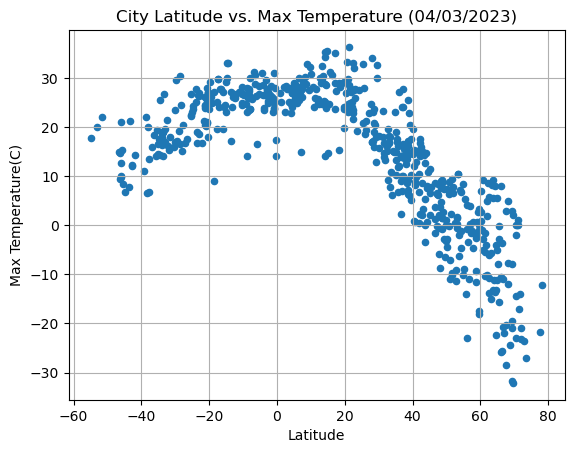

In [80]:
# Build scatter plot for latitude vs. temperature
ret = city_data_df.plot(kind = 'scatter', x = "Lat", y = "Max Temp", grid=True, title = ("City Latitude vs. Max Temperature (" + date + ")"), xlabel = "Latitude", ylabel = "Max Temperature(C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

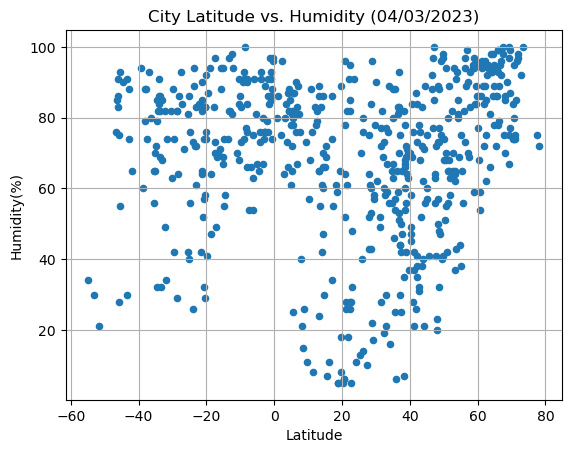

In [81]:
# Build the scatter plots for latitude vs. humidity
ret = city_data_df.plot(kind = 'scatter', x = "Lat", y = "Humidity", grid=True, title = "City Latitude vs. Humidity (" + date + ")", xlabel = "Latitude", ylabel = "Humidity(%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

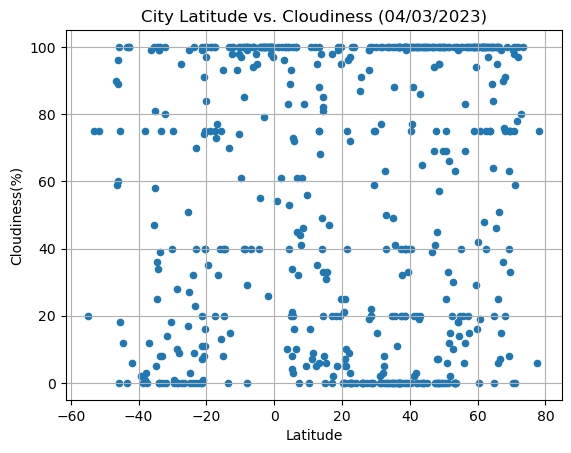

In [82]:
# Build the scatter plots for latitude vs. cloudiness
ret = city_data_df.plot(kind = 'scatter', x = "Lat", y = "Cloudiness", grid=True, title = "City Latitude vs. Cloudiness (" + date + ")", xlabel = "Latitude", ylabel = "Cloudiness(%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

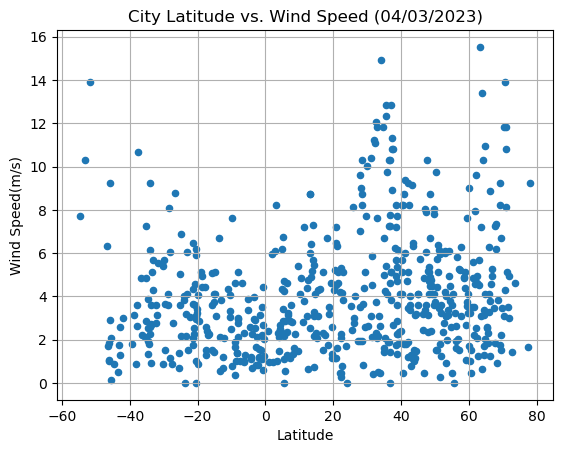

In [83]:
# Build the scatter plots for latitude vs. wind speed
ret = city_data_df.plot(kind = 'scatter', x = "Lat", y = "Wind Speed", grid=True, title = "City Latitude vs. Wind Speed (" + date + ')', xlabel = "Latitude", ylabel = "Wind Speed(m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [84]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,zeya,53.7500,127.2667,-6.35,91,100,3.36,RU,2023-04-03 18:57:59
2,albany,42.6001,-73.9662,15.91,32,19,4.02,US,2023-04-03 18:53:28
3,provideniya,64.3833,-173.3000,-13.56,94,89,3.39,RU,2023-04-03 18:58:03
6,deputatskiy,69.3000,139.9000,-19.55,100,63,1.73,RU,2023-04-03 18:58:14
7,bilma,18.6853,12.9164,28.20,5,99,3.53,NE,2023-04-03 18:58:16


In [85]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,14.33,82,34,1.81,ZA,2023-04-03 18:57:57
4,cape town,-33.9258,18.4232,17.84,84,0,2.57,ZA,2023-04-03 18:55:16
5,rikitea,-23.1203,-134.9692,26.37,83,70,6.05,PF,2023-04-03 18:58:11
8,atuona,-9.8000,-139.0333,26.59,83,97,7.64,PF,2023-04-03 18:58:21
10,avarua,-21.2078,-159.7750,26.03,65,20,2.06,CK,2023-04-03 18:58:28


###  Temperature vs. Latitude Linear Regression Plot

The pearson correlation coefficient between latitude and max temperature in the northern hemisphere is -0.88
The r-value is: 0.7716772339737913


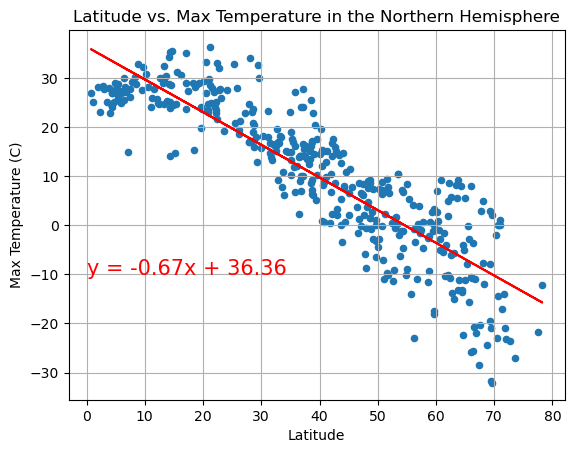

In [118]:
# Linear regression on Northern Hemisphere
northern_lat = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# caclulate the pearson correlation coefficient
correlation = st.pearsonr(northern_lat, y_values)
print(f"The pearson correlation coefficient between latitude and max temperature in the northern hemisphere is {round(correlation[0],2)}")

#run linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_lat, y_values)
regress_values = northern_lat * slope + intercept
print(f"The r-value is: {rvalue**2}")

#graph and annotate
fig, ax = plt.subplots()
ret = northern_hemi_df.plot(kind = 'scatter', x = "Lat", y = "Max Temp", grid=True, ax=ax, title = "Latitude vs. Max Temperature in the Northern Hemisphere", xlabel = "Latitude", ylabel = "Max Temperature (C)")
ret = ax.plot(northern_lat, regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ret = ax.annotate(line_eq,(0,-10),fontsize=15,color="red")


The correlation between latitude and max temperature in the southern hemisphere is 0.67
The r-value is: 0.4427938365144181


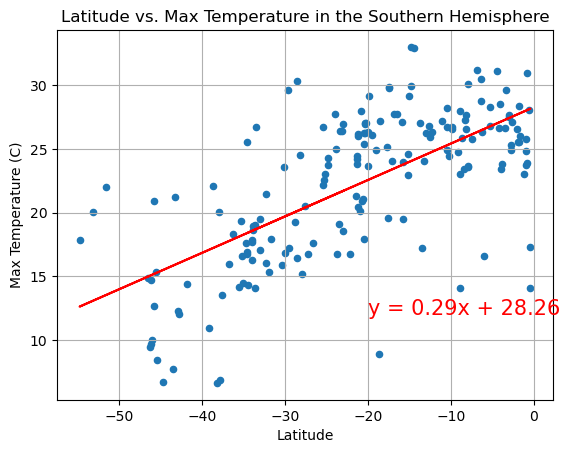

In [119]:
# Linear regression on Southern Hemisphere
southern_lat = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# caclulate the pearson correlation coefficient
correlation = st.pearsonr(southern_lat, y_values)
print(f"The correlation between latitude and max temperature in the southern hemisphere is {round(correlation[0],2)}")

#run linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_lat, y_values)
print(f"The r-value is: {rvalue**2}")
regress_values = southern_lat * slope + intercept

#graph and annotate
fig, ax = plt.subplots()
ret = southern_hemi_df.plot(kind = 'scatter', x = "Lat", y = "Max Temp", grid=True, ax=ax, title = "Latitude vs. Max Temperature in the Southern Hemisphere", xlabel = "Latitude", ylabel = "Max Temperature (C)")
ret = ax.plot(southern_lat, regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ret = ax.annotate(line_eq,(-20,12),fontsize=15,color="red")

**Discussion about the linear relationship:** The pearson correlation of temperature to latitude is fairly strong in both the sourthern and northern hemisphere with the correlation co-efficient being close to .7 or higher. In the northern hemisphere, the correlation is negative meaning as the latitude decreases (comes closer to the equator), the temperature increases. In the southern hemisphere, the correleation is positive meaning as the latitude increases (comes closer to the equator) the temperature increases. This is what we would expect.
The r-value in the northern hemisphere is fairly strong at .77 with 77% of the variance in the data explained by the model. The r-value in the southern hemisphere at .44 displays a weak association with 44% of the variance in the data explained by the model. 

### Humidity vs. Latitude Linear Regression Plot

The correlation between latitude and humidity in the northern hemisphere is 0.33
The r-value is: 0.10881886602931495


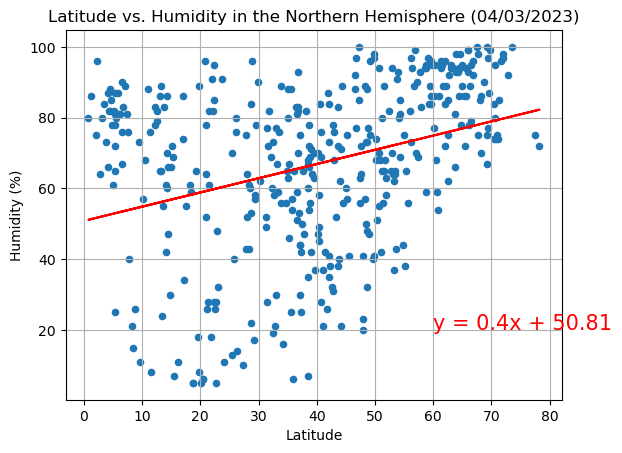

In [120]:
# Northern Hemisphere, latitude still stored in northern_lat variable
y_values = northern_hemi_df["Humidity"]

# caclulate the pearson correlation coefficient
correlation = st.pearsonr(northern_lat, y_values)
print(f"The correlation between latitude and humidity in the northern hemisphere is {round(correlation[0],2)}")

#run linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_lat, y_values)
regress_values = northern_lat * slope + intercept
print(f"The r-value is: {rvalue**2}")

#graph and annotate
fig, ax = plt.subplots()
ret = northern_hemi_df.plot(kind = 'scatter', x = "Lat", y = "Humidity", grid=True, ax=ax, title = "Latitude vs. Humidity in the Northern Hemisphere (" + date + ")", xlabel = "Latitude", ylabel = "Humidity (%)")
ret = ax.plot(northern_lat, regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ret = ax.annotate(line_eq,(60,20),fontsize=15,color="red")


The correlation between latitude and humidity in the southern hemisphere is 0.27
The r-value is: 0.07148218619648646


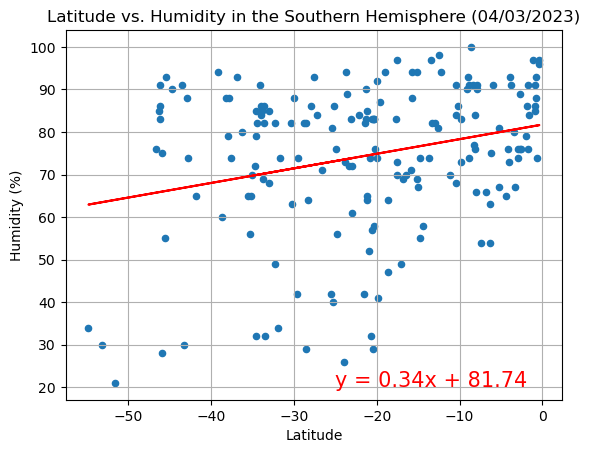

In [121]:
# Southern Hemisphere, latitude still stored in southern_lat variable
y_values = southern_hemi_df["Humidity"]

# caclulate the pearson correlation coefficient
correlation = st.pearsonr(southern_lat, y_values)
print(f"The correlation between latitude and humidity in the southern hemisphere is {round(correlation[0],2)}")

#run linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_lat, y_values)
regress_values = southern_lat * slope + intercept
print(f"The r-value is: {rvalue**2}")

#graph and annotate
fig, ax = plt.subplots()
ret = southern_hemi_df.plot(kind = 'scatter', x = "Lat", y = "Humidity", grid=True, ax=ax, title = "Latitude vs. Humidity in the Southern Hemisphere (" + date + ")", xlabel = "Latitude", ylabel = "Humidity (%)")
ret = ax.plot(southern_lat, regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ret = ax.annotate(line_eq,(-25,20),fontsize=15,color="red")


**Discussion about the linear relationship:** 
The pearson correlation coefficient of humidity to latitude is moderate in both the sourthern and northern hemispheres with the co-efficients being between .2 and .4. In the both hemispheres, the correleation is positive meaning as the latitude increases the humidity increases (somewhat). This means that the humidity increases as you near the equator in the southern hemisphere but increases as you move away from the equator in the northern hempisphere. Which is not what I would have expected.
r-values of .1 and .07 respectively, demonstrate a very weak or non-existent correlation between humidity and latitude. 
This may explain the odd results or it could be that our data set wasn't big enough or random enough.

### Cloudiness vs. Latitude Linear Regression Plot

The correlation between latitude and cloudiness in the northern hemisphere is 0.18
The r-value is: 0.03376899115606334


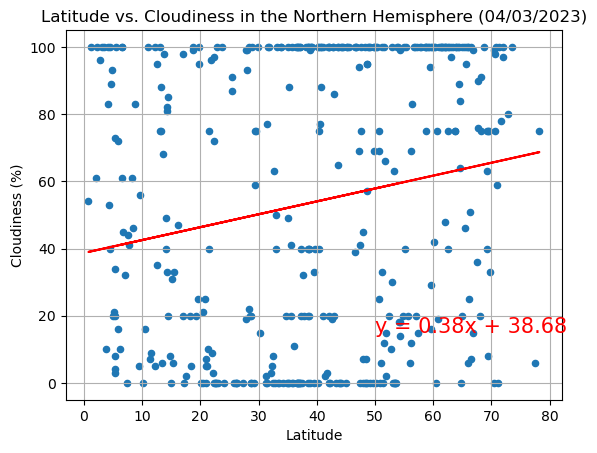

In [125]:
# Northern Hemisphere, latitude still stored in northern_lat variable
y_values = northern_hemi_df["Cloudiness"]

# caclulate the pearson correlation coefficient
correlation = st.pearsonr(northern_lat, y_values)
print(f"The correlation between latitude and cloudiness in the northern hemisphere is {round(correlation[0],2)}")

#run linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_lat, y_values)
regress_values = northern_lat * slope + intercept
print(f"The r-value is: {rvalue**2}")

#graph and annotate
fig, ax = plt.subplots()
ret = northern_hemi_df.plot(kind = 'scatter', x = "Lat", y = "Cloudiness", grid=True, ax=ax, title = "Latitude vs. Cloudiness in the Northern Hemisphere (" + date + ")", xlabel = "Latitude", ylabel = "Cloudiness (%)")
ret = ax.plot(northern_lat, regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ret = ax.annotate(line_eq,(50,15),fontsize=15,color="red")


The correlation between latitude and cloudiness in the southern hemisphere is 0.38
The r-value is: 0.14138818929862


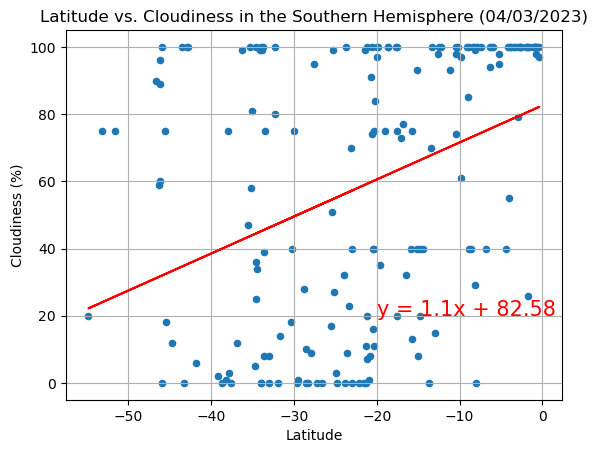

In [126]:
# Southern Hemisphere, latitude still stored in southern_lat variable
y_values = southern_hemi_df["Cloudiness"]

# caclulate the pearson correlation coefficient
correlation = st.pearsonr(southern_lat, y_values)
print(f"The correlation between latitude and cloudiness in the southern hemisphere is {round(correlation[0],2)}")

#run linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_lat, y_values)
regress_values = southern_lat * slope + intercept
print(f"The r-value is: {rvalue**2}")

#graph and annotate
fig, ax = plt.subplots()
ret = southern_hemi_df.plot(kind = 'scatter', x = "Lat", y = "Cloudiness", grid=True, ax=ax, title = "Latitude vs. Cloudiness in the Southern Hemisphere (" + date + ")", xlabel = "Latitude", ylabel = "Cloudiness (%)")
ret = ax.plot(southern_lat, regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ret = ax.annotate(line_eq,(-20,20),fontsize=15,color="red")


**Discussion about the linear relationship:** 
With r-values of .03 and .14 and pearson coefficients below .4, it would seem there is little correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The correlation between latitude and wind speed in the northern hemisphere is 0.13
The r-value is: 0.016108743166104802


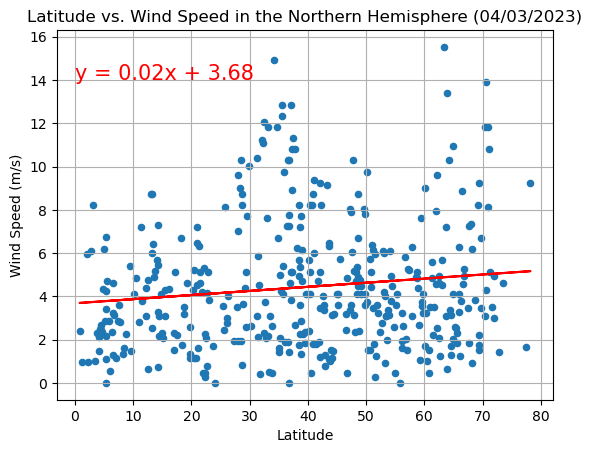

In [127]:
# Northern Hemisphere, latitude still stored in northern_lat variable
y_values = northern_hemi_df["Wind Speed"]

# caclulate the pearson correlation coefficient
correlation = st.pearsonr(northern_lat, y_values)
print(f"The correlation between latitude and wind speed in the northern hemisphere is {round(correlation[0],2)}")

#run linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_lat, y_values)
regress_values = northern_lat * slope + intercept
print(f"The r-value is: {rvalue**2}")

#graph and annotate
fig, ax = plt.subplots()
ret = northern_hemi_df.plot(kind = 'scatter', x = "Lat", y = "Wind Speed", grid=True, ax=ax, title = "Latitude vs. Wind Speed in the Northern Hemisphere (" + date + ")", xlabel = "Latitude", ylabel = "Wind Speed (m/s)")
ret = ax.plot(northern_lat, regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ret = ax.annotate(line_eq,(0,14),fontsize=15,color="red")

The correlation between latitude and wind speed in the southern hemisphere is -0.29
The r-value is: 0.08446132112230953


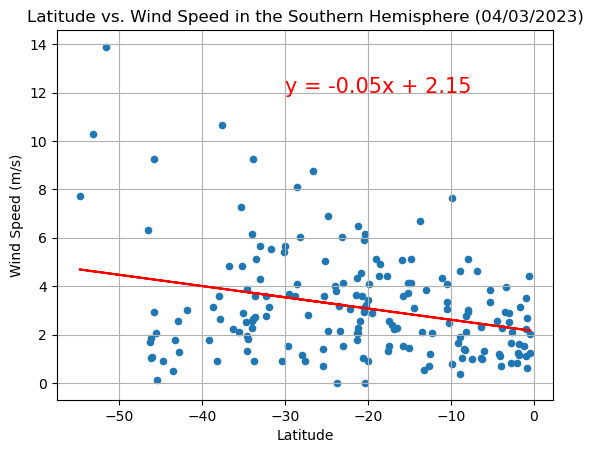

In [128]:
# Southern Hemisphere, latitude still stored in southern_lat variable
y_values = southern_hemi_df["Wind Speed"]

# caclulate the pearson correlation coefficient
correlation = st.pearsonr(southern_lat, y_values)
print(f"The correlation between latitude and wind speed in the southern hemisphere is {round(correlation[0],2)}")

#run linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_lat, y_values)
regress_values = southern_lat * slope + intercept
print(f"The r-value is: {rvalue**2}")

#graph and annotate
fig, ax = plt.subplots()
ret = southern_hemi_df.plot(kind = 'scatter', x = "Lat", y = "Wind Speed", grid=True, ax=ax, title = "Latitude vs. Wind Speed in the Southern Hemisphere (" + date + ")", xlabel = "Latitude", ylabel = "Wind Speed (m/s)")
ret = ax.plot(southern_lat, regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ret = ax.annotate(line_eq,(-30,12),fontsize=15,color="red")

**Discussion about the linear relationship:** With r-values of .01 and .08 and pearson coefficients well below .4, it would seem there is little correlation between latitude and wind speed.